### Import library

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate 

### Loading Dataset

In [3]:
#read data
data = pd.read_csv(r'dataset/CustomerChurn.csv')
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤═════════════╤═══════════════╤══════════════════╤═══════════╤══════════════╤══════════╤═════════════════╤══════════════════╤════════════════════╤═══════════════════╤═════════════════╤═════════════════════╤════════════════╤════════════════╤════════════════════╤════════════════╤═════════════════════╤═══════════════════════════╤═══════════════════╤═════════════════╤═════════╕
│    │   LoyaltyID │ Customer ID   │ Senior Citizen   │ Partner   │ Dependents   │   Tenure │ Phone Service   │ Multiple Lines   │ Internet Service   │ Online Security   │ Online Backup   │ Device Protection   │ Tech Support   │ Streaming TV   │ Streaming Movies   │ Contract       │ Paperless Billing   │ Payment Method            │   Monthly Charges │   Total Charges │ Churn   │
╞════╪═════════════╪═══════════════╪══════════════════╪═══════════╪══════════════╪══════════╪═════════════════╪══════════════════╪════════════════════╪═══════════════════╪═════════════════╪═════════════════════╪════════════════╪════════

In [4]:
# check shape
data.shape

(7043, 21)

In [5]:
#drop customer ID LoyaltyID 
data = data.drop(['Customer ID', 'LoyaltyID'], axis=1)


### EDA

In [6]:
#check for missing values
print(data.isnull().sum())

Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64


In [7]:
print(data.duplicated().sum())

41


In [8]:
#drop duplicates
data = data.drop_duplicates()

In [9]:
# check summary statistics
print(tabulate(data.describe() , headers='keys', tablefmt='fancy_grid'))

╒═══════╤═══════════╤═══════════════════╕
│       │    Tenure │   Monthly Charges │
╞═══════╪═══════════╪═══════════════════╡
│ count │ 7002      │         7002      │
├───────┼───────────┼───────────────────┤
│ mean  │   32.5548 │           64.9447 │
├───────┼───────────┼───────────────────┤
│ std   │   24.5133 │           30.0413 │
├───────┼───────────┼───────────────────┤
│ min   │    0      │           18.25   │
├───────┼───────────┼───────────────────┤
│ 25%   │    9      │           35.9    │
├───────┼───────────┼───────────────────┤
│ 50%   │   29      │           70.45   │
├───────┼───────────┼───────────────────┤
│ 75%   │   56      │           89.9    │
├───────┼───────────┼───────────────────┤
│ max   │   72      │          118.75   │
╘═══════╧═══════════╧═══════════════════╛


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7002 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7002 non-null   object 
 1   Partner            7002 non-null   object 
 2   Dependents         7002 non-null   object 
 3   Tenure             7002 non-null   int64  
 4   Phone Service      7002 non-null   object 
 5   Multiple Lines     7002 non-null   object 
 6   Internet Service   7002 non-null   object 
 7   Online Security    7002 non-null   object 
 8   Online Backup      7002 non-null   object 
 9   Device Protection  7002 non-null   object 
 10  Tech Support       7002 non-null   object 
 11  Streaming TV       7002 non-null   object 
 12  Streaming Movies   7002 non-null   object 
 13  Contract           7002 non-null   object 
 14  Paperless Billing  7002 non-null   object 
 15  Payment Method     7002 non-null   object 
 16  Monthly Charges    7002 non-n

In [11]:
#convert dtype of Total Charges to float
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
data['Total Charges'].dtype



dtype('float64')

In [12]:
#dividid data into numerical and categorical
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(exclude = np.number)



In [13]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7002 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tenure           7002 non-null   int64  
 1   Monthly Charges  7002 non-null   float64
 2   Total Charges    6991 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 218.8 KB


In [14]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7002 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Senior Citizen     7002 non-null   object
 1   Partner            7002 non-null   object
 2   Dependents         7002 non-null   object
 3   Phone Service      7002 non-null   object
 4   Multiple Lines     7002 non-null   object
 5   Internet Service   7002 non-null   object
 6   Online Security    7002 non-null   object
 7   Online Backup      7002 non-null   object
 8   Device Protection  7002 non-null   object
 9   Tech Support       7002 non-null   object
 10  Streaming TV       7002 non-null   object
 11  Streaming Movies   7002 non-null   object
 12  Contract           7002 non-null   object
 13  Paperless Billing  7002 non-null   object
 14  Payment Method     7002 non-null   object
 15  Churn              7002 non-null   object
dtypes: object(16)
memory usage: 930.0+ KB


### Univariate Analysis

C:\Users\pron\AppData\Local\Temp\ipykernel_1288\545726439.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[variable], ax=subplot , palette='viridis')
C:\Users\pron\AppData\Local\Temp\ipykernel_1288\545726439.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[variable], ax=subplot , palette='viridis')
C:\Users\pron\AppData\Local\Temp\ipykernel_1288\545726439.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[variable], ax=subplot , palette='viridis')
C:\Users\pron\AppData\Local\Temp\ipykernel_1288\545726439.py:4: Fut

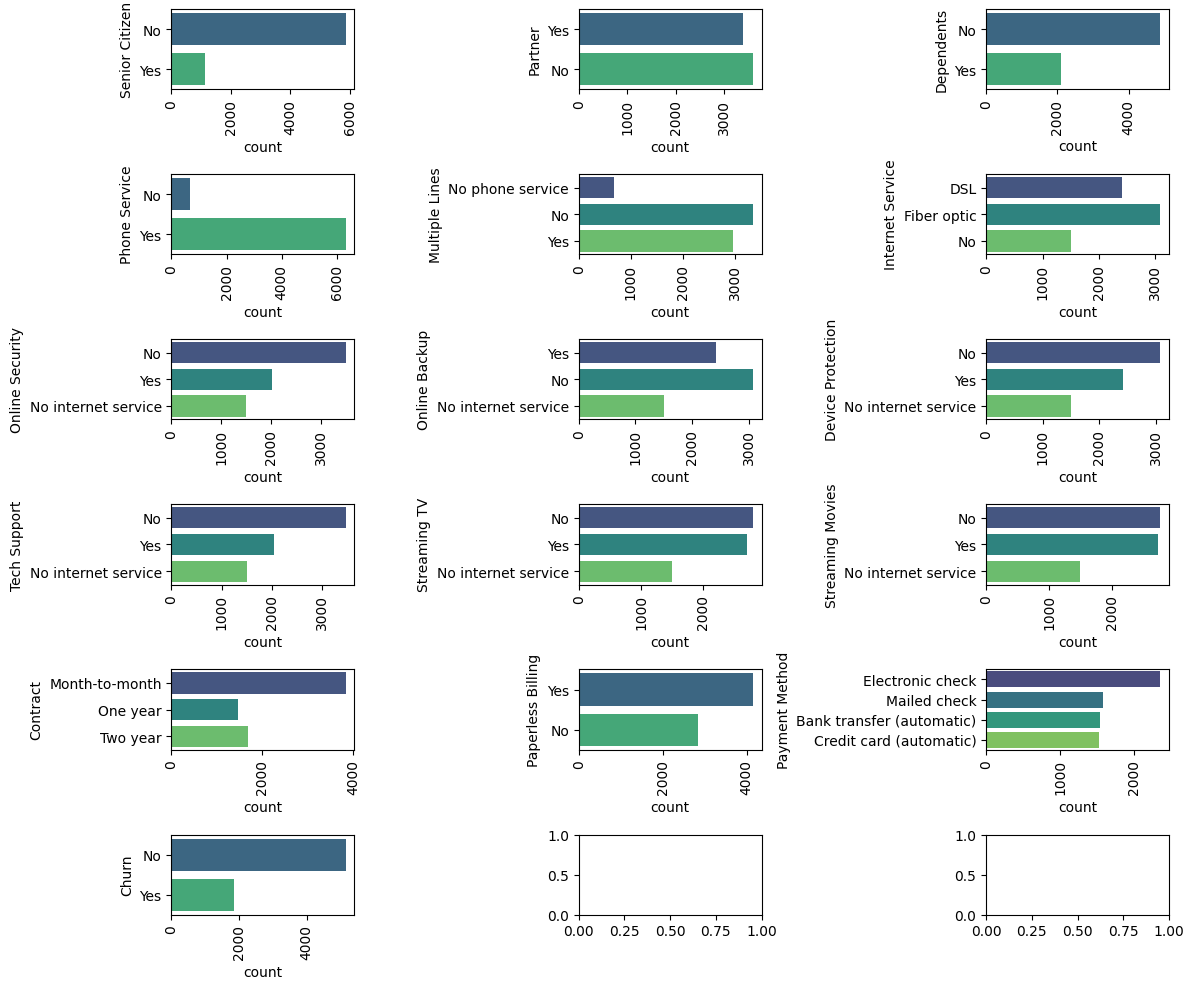

In [15]:
#plot categorical as a subplot use color palette
fig, ax = plt.subplots(6, 3, figsize=(12, 10))
for variable, subplot in zip(categorical.columns, ax.flatten()):
    sns.countplot(data[variable], ax=subplot , palette='viridis')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()


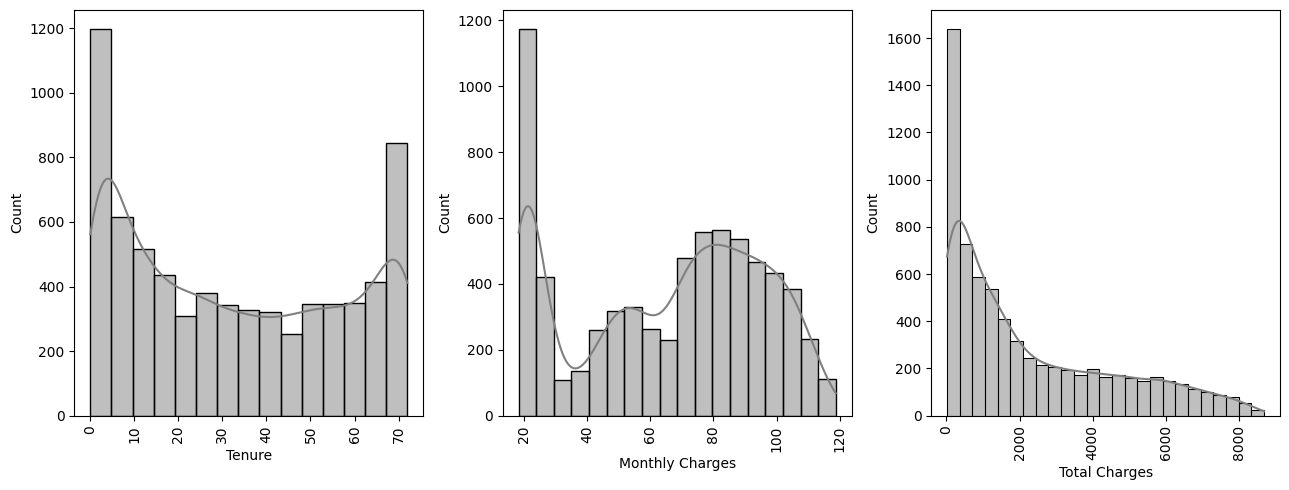

In [16]:
#plot numerical as a subplot
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
for variable, subplot in zip(numerical.columns, ax.flatten()):
    sns.histplot(data[variable], ax=subplot, kde=True , color='gray')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()


C:\Users\pron\AppData\Local\Temp\ipykernel_1288\1604262776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[variable], ax=subplot , palette='viridis')
C:\Users\pron\AppData\Local\Temp\ipykernel_1288\1604262776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[variable], ax=subplot , palette='viridis')
C:\Users\pron\AppData\Local\Temp\ipykernel_1288\1604262776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[variable], ax=subplot , palette='viridis')


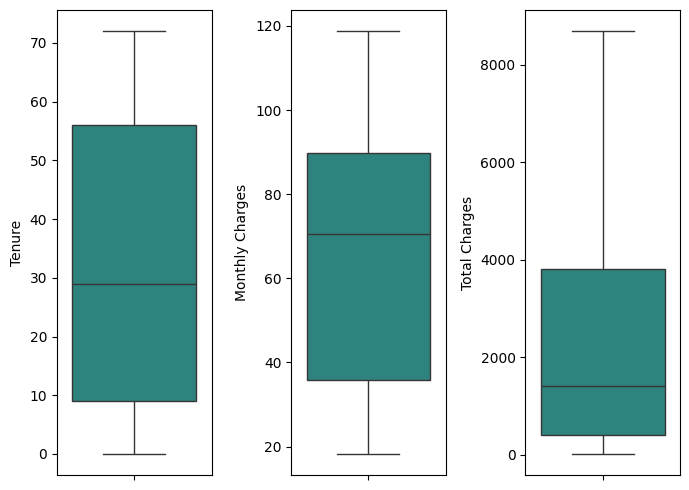

In [19]:
#plot box plot check outlier
fig, ax = plt.subplots(1, 3, figsize=(7, 5))
for variable, subplot in zip(numerical.columns, ax.flatten()):
    sns.boxplot(data[variable], ax=subplot , palette='viridis')

plt.tight_layout()


### Bivariate analysis

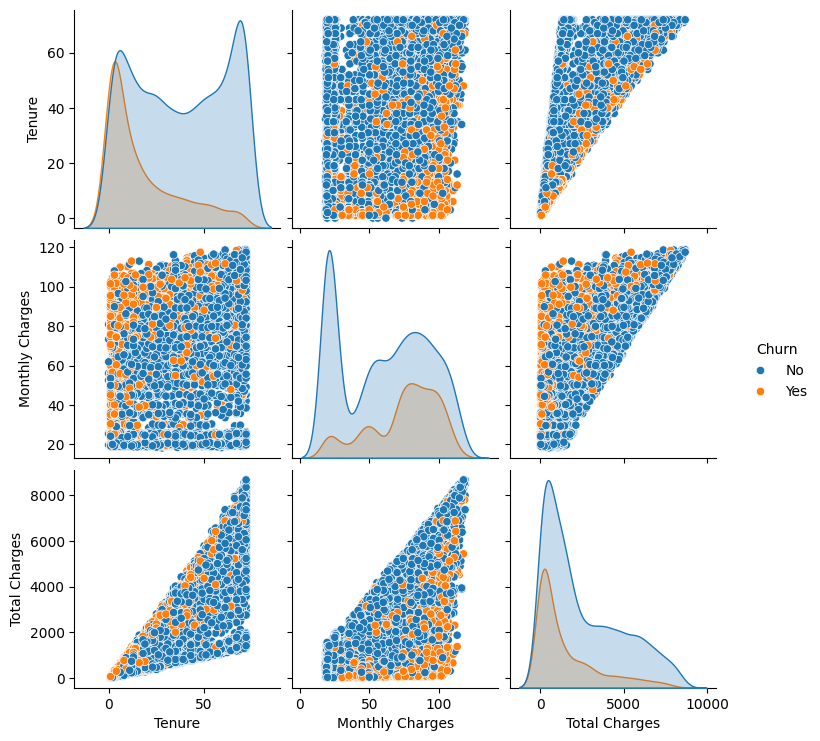

In [17]:
#plot pair plot
sns.pairplot(data, hue='Churn', diag_kind='kde' , )



### Multivariate Analysis

<Axes: >

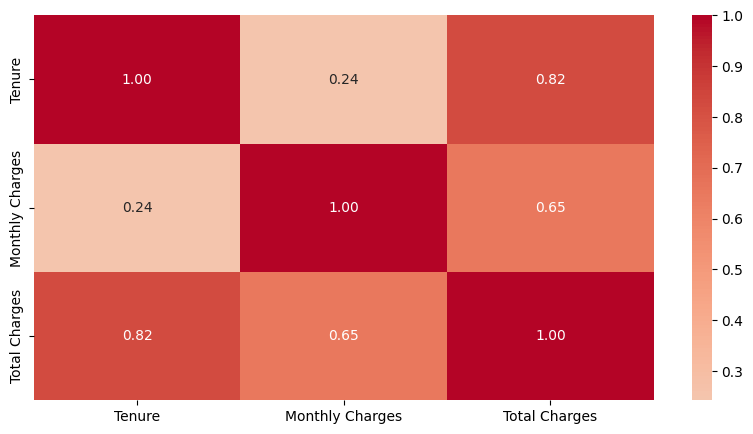

In [18]:
#plot corr numerical 
plt.figure(figsize=(10, 5))
sns.heatmap(numerical.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)



### Model Building

#### Encoding Data 

In [20]:
#Label Encoding for categorical data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in categorical:
    data[col] = label.fit_transform(data[col])

data.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### Drop Target

In [21]:
from sklearn.model_selection import train_test_split
X = data.drop('Churn', axis=1)
y = data['Churn']

#### Feature Scaled

In [22]:
#feature scaled
X_scaled = (X-np.min(X , axis = 0)) / (np.max(X , axis = 0) - np.min(X , axis = 0))
print(X_scaled[:5])

   Senior Citizen  Partner  Dependents    Tenure  Phone Service  \
0             0.0      1.0         0.0  0.013889            0.0   
1             0.0      0.0         0.0  0.472222            1.0   
2             0.0      0.0         0.0  0.027778            1.0   
3             0.0      0.0         0.0  0.625000            0.0   
4             0.0      0.0         0.0  0.027778            1.0   

   Multiple Lines  Internet Service  Online Security  Online Backup  \
0             0.5               0.0              0.0            1.0   
1             0.0               0.0              1.0            0.0   
2             0.0               0.0              1.0            1.0   
3             0.5               0.0              1.0            0.0   
4             0.0               0.5              0.0            0.0   

   Device Protection  Tech Support  Streaming TV  Streaming Movies  Contract  \
0                0.0           0.0           0.0               0.0       0.0   
1         

#### Split data to train test

In [23]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5601, 18) (1401, 18) (5601,) (1401,)


#### Logistic From Sklearn

In [24]:
from sklearn.impute import SimpleImputer

# Create an imputer transformer
imputer = SimpleImputer()

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training and test data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit the model on the imputed data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_imputed, y_train)




LogisticRegression()

In [25]:
# Predict the labels of the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


### Build Logistic from sctrak

#### Convert array to tensor

In [26]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [27]:
# convert arrays to tensors
X_train_tensor = torch.tensor(X_train_imputed, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)



In [28]:
# training
theta = torch.zeros(X_train_tensor.size(1), 1, requires_grad=True)
alpha = 0.01

for epoch in range(1, 10001):
  z = torch.matmul(X_train_tensor, theta)
  h = torch.sigmoid(z)

  cost = -y_train_tensor*torch.log(h)-(1-y_train_tensor)*torch.log(1-h)
  cost = cost.mean()

  # calculate derivatives
  cost.backward()

  # update parameters
  theta.requires_grad = False
  theta += -alpha * theta.grad
  theta.grad.zero_()
  theta.requires_grad = True

  if epoch%10 == 0:
    print(f'Epoch {epoch:02d}, Cost = {cost.item():0.4f}')

Epoch 10, Cost = 0.6683
Epoch 20, Cost = 0.6458
Epoch 30, Cost = 0.6274
Epoch 40, Cost = 0.6124
Epoch 50, Cost = 0.6000
Epoch 60, Cost = 0.5897
Epoch 70, Cost = 0.5811
Epoch 80, Cost = 0.5739
Epoch 90, Cost = 0.5677
Epoch 100, Cost = 0.5624
Epoch 110, Cost = 0.5578
Epoch 120, Cost = 0.5538
Epoch 130, Cost = 0.5503
Epoch 140, Cost = 0.5472
Epoch 150, Cost = 0.5444
Epoch 160, Cost = 0.5419
Epoch 170, Cost = 0.5395
Epoch 180, Cost = 0.5374
Epoch 190, Cost = 0.5355
Epoch 200, Cost = 0.5337
Epoch 210, Cost = 0.5320
Epoch 220, Cost = 0.5304
Epoch 230, Cost = 0.5289
Epoch 240, Cost = 0.5274
Epoch 250, Cost = 0.5260
Epoch 260, Cost = 0.5247
Epoch 270, Cost = 0.5235
Epoch 280, Cost = 0.5223
Epoch 290, Cost = 0.5211
Epoch 300, Cost = 0.5199
Epoch 310, Cost = 0.5188
Epoch 320, Cost = 0.5178
Epoch 330, Cost = 0.5167
Epoch 340, Cost = 0.5157
Epoch 350, Cost = 0.5147
Epoch 360, Cost = 0.5137
Epoch 370, Cost = 0.5128
Epoch 380, Cost = 0.5118
Epoch 390, Cost = 0.5109
Epoch 400, Cost = 0.5100
Epoch 410

In [29]:
# Evaluate
h = torch.sigmoid(torch.matmul(X_train_tensor, theta))
tz = y_train_tensor.clone()
tz[h>=0.5] = 1
tz[h<0.5] = 0

accuracy = (tz == y_train_tensor).int().sum()/len(X)
print(f'Accuray = {accuracy*100:.2f}%')

Accuray = 63.91%


### Random forest Model

In [31]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1039
           1       0.59      0.45      0.51       362

    accuracy                           0.78      1401
   macro avg       0.71      0.67      0.68      1401
weighted avg       0.76      0.78      0.77      1401



### Nueral network model

In [32]:
#Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.size(1), 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
    
model = NeuralNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Create a DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)



In [35]:
# Training
num_epochs = 1000
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    if epoch%10 == 0:
        print(f'Epoch {epoch:02d}, Loss: {loss.item():.4f}')
        

Epoch 00, Loss: 0.2083
Epoch 10, Loss: 0.4775
Epoch 20, Loss: 0.3521
Epoch 30, Loss: 0.4286
Epoch 40, Loss: 0.4205
Epoch 50, Loss: 0.4109
Epoch 60, Loss: 0.3862
Epoch 70, Loss: 0.3041
Epoch 80, Loss: 0.3253
Epoch 90, Loss: 0.3467
Epoch 100, Loss: 0.2832
Epoch 110, Loss: 0.3653
Epoch 120, Loss: 0.2324
Epoch 130, Loss: 0.1527
Epoch 140, Loss: 0.2874
Epoch 150, Loss: 0.3344
Epoch 160, Loss: 0.2024
Epoch 170, Loss: 0.2745
Epoch 180, Loss: 0.2569
Epoch 190, Loss: 0.2217
Epoch 200, Loss: 0.2625
Epoch 210, Loss: 0.2806
Epoch 220, Loss: 0.1613
Epoch 230, Loss: 0.3679
Epoch 240, Loss: 0.2070
Epoch 250, Loss: 0.2764
Epoch 260, Loss: 0.2594
Epoch 270, Loss: 0.3372
Epoch 280, Loss: 0.4113
Epoch 290, Loss: 0.2973
Epoch 300, Loss: 0.4065
Epoch 310, Loss: 0.4150
Epoch 320, Loss: 0.1393
Epoch 330, Loss: 0.1357
Epoch 340, Loss: 0.3143
Epoch 350, Loss: 0.1278
Epoch 360, Loss: 0.1638
Epoch 370, Loss: 0.2892
Epoch 380, Loss: 0.5046
Epoch 390, Loss: 0.1949
Epoch 400, Loss: 0.2570
Epoch 410, Loss: 0.1544
Ep

In [36]:

# Evaluate
with torch.no_grad():
    outputs = model(X_train_tensor)
    outputs[outputs >= 0.5] = 1
    outputs[outputs < 0.5] = 0
    accuracy = (outputs == y_train_tensor).int().sum()/len(X_train_tensor)
    print(f'Accuracy: {accuracy*100:.2f}%')

# Predict the labels of the test set
with torch.no_grad():
    outputs = model(X_test_tensor)
    outputs[outputs >= 0.5] = 1
    outputs[outputs < 0.5] = 0
    accuracy = (outputs == y_test_tensor).int().sum()/len(X_test_tensor)
    print(f'Accuracy: {accuracy*100:.2f}%')
    

Accuracy: 89.13%
Accuracy: 74.88%


### XGboost Model

In [37]:
#xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_imputed, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.77
